In [1]:
from copy import deepcopy

import matplotlib.pyplot as plt
import numpy as np
import ocelot as oc
from ocelot.adaptors.astra2ocelot import astraBeam2particleArray
from ocelot.gui.beam_plot import show_density, show_e_beam

import ARESlatticeStage3v1_9 as ares

### Load the lattice

In [2]:
ares.areamqzm1.k1 = 10.0
ares.areamqzm2.k1 = -9.0
ares.areamcvm1.angle = 1e-3
ares.areamqzm3.k1 = -8.0
ares.areamchm1.angle = -2e-3

lattice = oc.MagneticLattice(ares.cell, start=ares.areasola1, stop=ares.areabscr1)
lattice

### Load the particle distribution

In [3]:
p_array = astraBeam2particleArray("ACHIP_EA1_2021.1351.001") 

Astra to Ocelot: charge =  5.000000000001694e-13  C
Astra to Ocelot: particles number =  100000
Astra to Ocelot: energy =  0.10731590244355117  GeV
Astra to Ocelot: s pos =  13.50890653269  m


### Benchmark

We start with Ocelot in its fastest setup and without getting screen data

In [4]:
%%timeit
navi = oc.Navigator(lattice)
navi.unit_step = lattice.totalLen
tws_track, p_array_out = oc.track(lattice, deepcopy(p_array), navi, print_progress=False)

202 ms ± 25 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [4]:
navi = oc.Navigator(lattice)
navi.unit_step = lattice.totalLen
tws_track, p_array_out = oc.track(lattice, deepcopy(p_array), navi)

z = 2.0460399999999996 / 2.0460399999999996 : applied:  

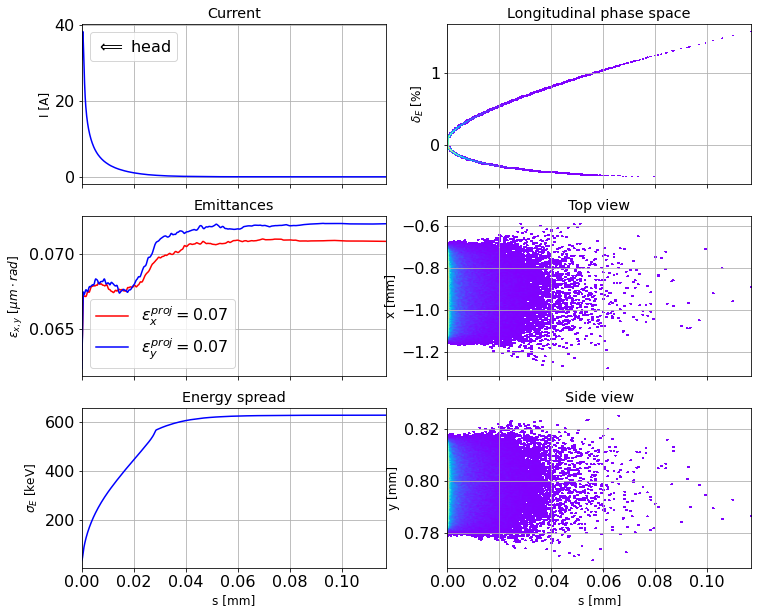

In [5]:
show_e_beam(p_array_out, figsize=(12,10))
plt.show()

Now generate screen data as well

In [6]:
screen_resolution = (2448, 2040)
meter_per_pixel = (3.5488e-6, 2.5003e-6)
screen_bin_edges = (np.linspace(-screen_resolution[0] * meter_per_pixel[0] / 2,
                                screen_resolution[0] * meter_per_pixel[0] / 2,
                                screen_resolution[0] + 1),
                    np.linspace(-screen_resolution[1] * meter_per_pixel[1] / 2,
                                screen_resolution[1] * meter_per_pixel[1] / 2,
                                screen_resolution[1] + 1))

In [8]:
%%timeit
navi = oc.Navigator(lattice)
navi.unit_step = lattice.totalLen
tws_track, p_array_out = oc.track(lattice, deepcopy(p_array), navi, print_progress=False)
img = np.histogram2d(p_array_out.x(), p_array_out.y(), bins=screen_bin_edges)[0].transpose()
img = np.flipud(img)

z = 2.0460399999999996 / 2.0460399999999996 : applied:  827 ms ± 233 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


z = 2.0460399999999996 / 2.0460399999999996 : applied:  

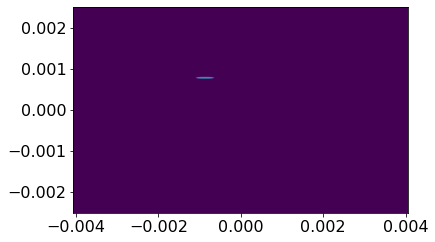

In [7]:
navi = oc.Navigator(lattice)
navi.unit_step = lattice.totalLen
tws_track, p_array_out = oc.track(lattice, deepcopy(p_array), navi)
img = np.histogram2d(p_array_out.x(), p_array_out.y(), bins=screen_bin_edges)[0].transpose()
img = np.flipud(img)

plt.imshow(img, extent=(-0.0040634352,0.0040634352,-0.002495838,0.002495838))
plt.show()

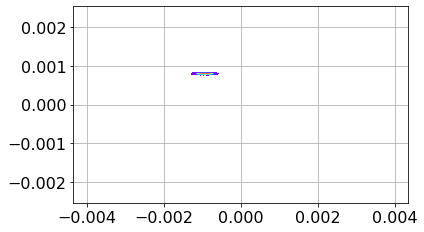

In [8]:
show_density(p_array_out.x(), p_array_out.y(), limits=[(-screen_resolution[0] * meter_per_pixel[0] / 2,
                                                         screen_resolution[0] * meter_per_pixel[0] / 2),
                                                       (-screen_resolution[1] * meter_per_pixel[1] / 2,
                                                         screen_resolution[1] * meter_per_pixel[1] / 2)])
plt.gca().set_aspect("equal")
plt.show()

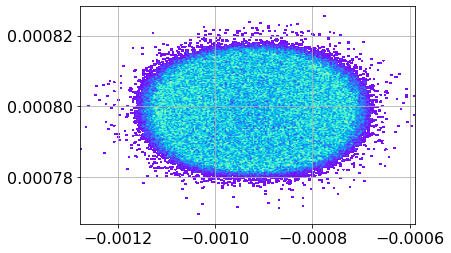

In [9]:
show_density(p_array_out.x(), p_array_out.y())
plt.show()

Add space charge (with and without screen data)

In [11]:
%%timeit
navi = oc.Navigator(lattice)
sc = oc.SpaceCharge()
navi.add_physics_proc(sc, ares.areasola1, ares.areabscr1)
navi.unit_step = 0.02
tws_track, p_array_out = oc.track(lattice, deepcopy(p_array), navi, print_progress=False)

39.7 s ± 3.73 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [13]:
%%timeit
navi = oc.Navigator(lattice)
sc = oc.SpaceCharge()
navi.add_physics_proc(sc, ares.areasola1, ares.areabscr1)
navi.unit_step = 0.02
tws_track, p_array_out = oc.track(lattice, deepcopy(p_array), navi, print_progress=False)
img = np.histogram2d(p_array_out.x(), p_array_out.y(), bins=screen_bin_edges)[0].transpose()
img = np.flipud(img)

43.4 s ± 5.2 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


z = 2.0460399999999996 / 2.0460399999999996 : applied: SpaceChargee

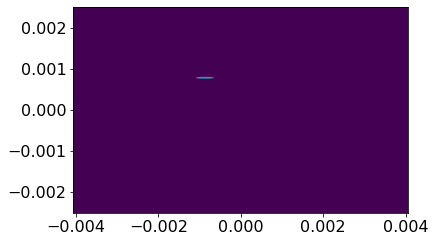

In [10]:
navi = oc.Navigator(lattice)
sc = oc.SpaceCharge()
navi.add_physics_proc(sc, ares.areasola1, ares.areabscr1)
navi.unit_step = 0.02
tws_track, p_array_out = oc.track(lattice, deepcopy(p_array), navi)
img = np.histogram2d(p_array_out.x(), p_array_out.y(), bins=screen_bin_edges)[0].transpose()
img = np.flipud(img)

plt.imshow(img, extent=(-0.0040634352,0.0040634352,-0.002495838,0.002495838))
plt.show()

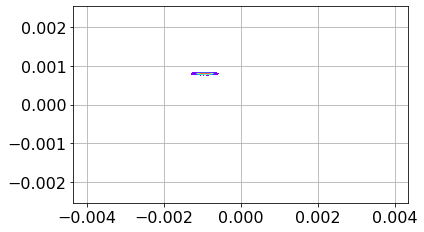

In [11]:
show_density(p_array_out.x(), p_array_out.y(), limits=[(-screen_resolution[0] * meter_per_pixel[0] / 2,
                                                         screen_resolution[0] * meter_per_pixel[0] / 2),
                                                       (-screen_resolution[1] * meter_per_pixel[1] / 2,
                                                         screen_resolution[1] * meter_per_pixel[1] / 2)])
plt.gca().set_aspect("equal")
plt.show()

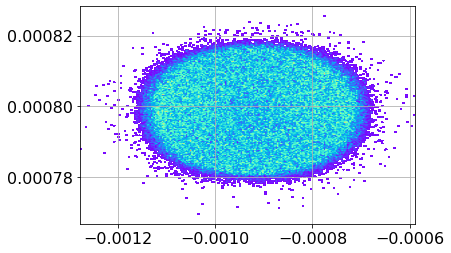

In [12]:
show_density(p_array_out.x(), p_array_out.y())
plt.show()

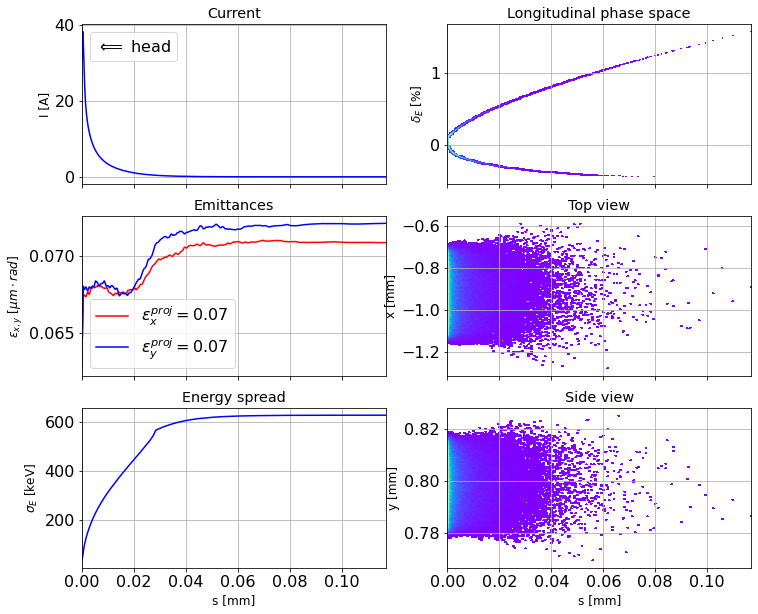

In [13]:
show_e_beam(p_array_out, figsize=(12,10))
plt.show()